<a href="https://colab.research.google.com/github/rasushi/customer_churn_prediction/blob/main/churn_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/rasushi/customer_churn_prediction/refs/heads/main/Churn_Modelling.csv')

In [6]:


df.head()
#print(df.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [10]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [11]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [12]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)#one hot encoding

In [15]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [16]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [17]:
 y


,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [18]:
X_train.shape


(8000, 11)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [20]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model=Sequential()
model.add(Dense(10,activation='relu',input_dim=11))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [25]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7226 - loss: 0.6021 - val_accuracy: 0.7975 - val_loss: 0.4953
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8099 - loss: 0.4545 - val_accuracy: 0.8056 - val_loss: 0.4528
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8167 - loss: 0.4382 - val_accuracy: 0.8106 - val_loss: 0.4412
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8212 - loss: 0.4265 - val_accuracy: 0.8169 - val_loss: 0.4332
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8298 - loss: 0.4129 - val_accuracy: 0.8194 - val_loss: 0.4261
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8340 - loss: 0.4115 - val_accuracy: 0.8188 - val_loss: 0.4208
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8411 - loss: 0.3911 - val_accuracy: 0.8250 - val_loss: 0.4158
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8342 - loss: 0.4006 - val_accu

In [26]:
model.layers[0].get_weights()

[array([[-4.06470507e-01, -4.77028564e-02,  4.39612836e-01,
          2.55969107e-01,  5.12752309e-02, -1.32786915e-01,
         -2.79996365e-01,  6.56709373e-01, -1.63816258e-01,
         -1.01442948e-01],
        [ 7.53595769e-01, -5.26077509e-01,  5.57275534e-01,
         -8.37675273e-01, -7.21385419e-01, -2.03938350e-01,
         -9.55394924e-01,  3.50032628e-01,  5.98262787e-01,
          4.75669047e-03],
        [ 3.83308351e-01,  3.48724686e-02,  2.46709604e-02,
         -1.06102414e-01, -7.11958623e-04,  2.20363051e-01,
          3.24904025e-02, -2.46074498e-01,  7.90737271e-02,
          1.17208481e-01],
        [-4.35335010e-01,  3.63691419e-01,  2.32516527e-01,
          2.36856073e-01, -1.74435109e-01, -9.14091825e-01,
         -4.18256968e-01, -7.45927572e-01, -3.61163676e-01,
         -1.88020706e-01],
        [ 3.25127572e-01, -5.57555377e-01,  4.22264606e-01,
          5.25702953e-01,  1.11214757e-01, -5.41236877e-01,
          7.74712339e-02, -3.51198047e-01, -5.858786

In [27]:
y_log=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [28]:
y_pred=np.where(y_log>0.5,1,0)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8615

In [30]:
import matplotlib.pyplot as plt

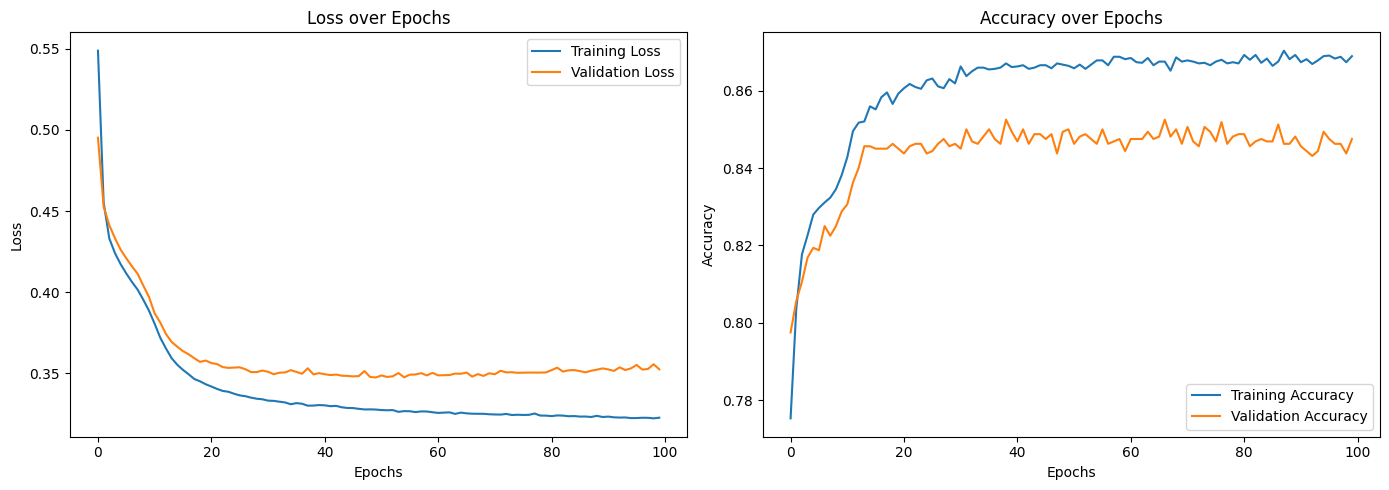

In [31]:
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [32]:
# Print last 5 epochs of accuracy and loss
print("Training Accuracy (last 5 epochs):", history.history['accuracy'][-5:])
print("Validation Accuracy (last 5 epochs):", history.history['val_accuracy'][-5:])
print("Training Loss (last 5 epochs):", history.history['loss'][-5:])
print("Validation Loss (last 5 epochs):", history.history['val_loss'][-5:])


Training Accuracy (last 5 epochs): [0.8690624833106995, 0.8682812452316284, 0.8687499761581421, 0.8673437237739563, 0.8689062595367432]
Validation Accuracy (last 5 epochs): [0.8475000262260437, 0.8462499976158142, 0.8462499976158142, 0.84375, 0.8475000262260437]
Training Loss (last 5 epochs): [0.32222995162010193, 0.3224145174026489, 0.3223665654659271, 0.32204705476760864, 0.32244572043418884]
Validation Loss (last 5 epochs): [0.35501784086227417, 0.3521326780319214, 0.3525146543979645, 0.35543906688690186, 0.35228753089904785]


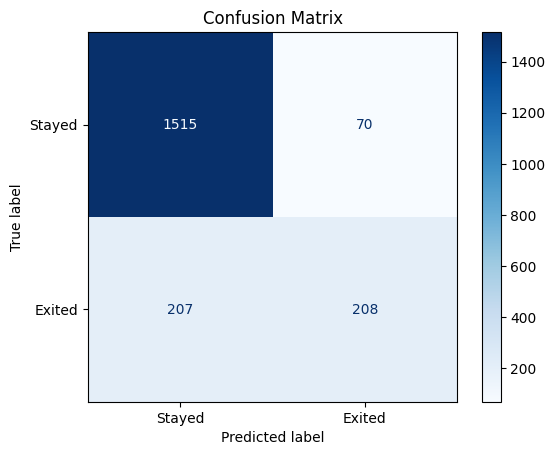

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stayed', 'Exited'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [34]:
def predict_churn(model, scaler, customer_data):

    customer_scaled = scaler.transform(customer_data)
    churn_probability = model.predict(customer_scaled)[0][0]
    churn_prediction = 1 if churn_probability > 0.5 else 0

    return churn_probability, churn_prediction

In [35]:

new_customer = pd.DataFrame([{
    'CreditScore': 600,
    'Age': 45,
    'Tenure': 5,
    'Balance': 120000.0,
    'NumOfProducts': 1,
    'HasCrCard': 1,
    'IsActiveMember': 0,
    'EstimatedSalary': 90000.0,
    'Geography_Germany': 0,
    'Geography_Spain': 1,
    'Gender_Male': 1
}])


prob, pred = predict_churn(model, scaler, new_customer)


print(f"Churn Probability: {prob:.2f}")
print("Prediction: Will Leave" if pred == 1 else "Prediction: Will Stay")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Churn Probability: 0.42
Prediction: Will Stay
